In [1]:
import pandas as pd    
import numpy as np        
import matplotlib.pyplot as plt     
import seaborn as sns

In [2]:
data = pd.read_csv(r"Amazon Sale Report.csv" ,  low_memory=False)

In [3]:
data.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [4]:
data.shape

(128975, 24)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

## Removing index col

In [7]:
data.drop(columns=["index"], axis=1, inplace=True)

In [8]:
data.head()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


## changing data type --- date(datetime), Ship postal code(int)

In [10]:
from datetime import datetime

# Define the date format
date_format = "%m-%d-%y"  # MM-DD-YY format

# Define a function to parse the date string
def parse_date(date_str):
    try:
        return datetime.strptime(date_str, date_format)
    except ValueError:
        return None  # Handle cases where the date format might be incorrect

# Apply the parsing function to the 'Date' column
data['Date'] = data['Date'].apply(parse_date)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Order ID            128975 non-null  object        
 1   Date                128975 non-null  datetime64[ns]
 2   Status              128975 non-null  object        
 3   Fulfilment          128975 non-null  object        
 4   Sales Channel       128975 non-null  object        
 5   ship-service-level  128975 non-null  object        
 6   Style               128975 non-null  object        
 7   SKU                 128975 non-null  object        
 8   Category            128975 non-null  object        
 9   Size                128975 non-null  object        
 10  ASIN                128975 non-null  object        
 11  Courier Status      122103 non-null  object        
 12  Qty                 128975 non-null  int64         
 13  currency            121180 no

### Ship postal code

In [13]:
data.isnull().sum()

Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

In [14]:
data["ship-postal-code"].describe()

count    128942.000000
mean     463966.236509
std      191476.764941
min      110001.000000
25%      382421.000000
50%      500033.000000
75%      600024.000000
max      989898.000000
Name: ship-postal-code, dtype: float64

In [15]:
data["ship-postal-code"] = data["ship-postal-code"].replace(np.nan ,463966.236509)

In [16]:
data["ship-postal-code"] = data["ship-postal-code"].astype(int)

In [17]:
data.isnull().sum()

Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code          0
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

In [19]:
print(data)

                   Order ID       Date                        Status  \
0       405-8078784-5731545 2022-04-30                     Cancelled   
1       171-9198151-1101146 2022-04-30  Shipped - Delivered to Buyer   
2       404-0687676-7273146 2022-04-30                       Shipped   
3       403-9615377-8133951 2022-04-30                     Cancelled   
4       407-1069790-7240320 2022-04-30                       Shipped   
...                     ...        ...                           ...   
128970  406-6001380-7673107 2022-05-31                       Shipped   
128971  402-9551604-7544318 2022-05-31                       Shipped   
128972  407-9547469-3152358 2022-05-31                       Shipped   
128973  402-6184140-0545956 2022-05-31                       Shipped   
128974  408-7436540-8728312 2022-05-31                       Shipped   

       Fulfilment Sales Channel  ship-service-level    Style              SKU  \
0        Merchant      Amazon.in           Standard   

## filling missing values----- promotion-ids

In [21]:
data["promotion-ids"].isnull().sum()

49153

In [22]:
data["promotion-ids"].describe()

count                                            79822
unique                                            5787
top       IN Core Free Shipping 2015/04/08 23-48-5-108
freq                                             46100
Name: promotion-ids, dtype: object

In [23]:
data["promotion-ids"] = data["promotion-ids"].replace(np.nan, "IN Core Free Shipping 2015/04/08 23-48-5-108")

In [24]:
data.isnull().sum()

Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code          0
ship-country             33
promotion-ids             0
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

## Filling Missing values----fulfilled-by  

In [31]:
(data["fulfilled-by"] == "Easy Ship").sum()

39277

In [33]:
data["fulfilled-by"].unique()

array(['Easy Ship', nan], dtype=object)

In [34]:
data.isnull().sum()

Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code          0
ship-country             33
promotion-ids             0
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

#### Dropping column -----fulfilled-by   

In [36]:
data.drop(columns=["fulfilled-by"], inplace = True)

## Removing column-----Unnamed: 22  

In [38]:
data["Unnamed: 22"].unique()

array([nan, False], dtype=object)

In [39]:
data.drop(columns=["Unnamed: 22"], inplace=True)

## Filling missing value----- Courier Status 

In [42]:
data["Courier Status"].unique()

array([nan, 'Shipped', 'Cancelled', 'Unshipped'], dtype=object)

In [44]:
data["Courier Status"].isnull().sum()

6872

In [49]:
data["Courier Status"].describe()

count      122103
unique          3
top       Shipped
freq       109487
Name: Courier Status, dtype: object

In [52]:
(data["Courier Status"] == "Shipped").sum()

109487

In [56]:
(data["Courier Status"] == "Cancelled").sum()

5935

In [58]:
(data["Courier Status"] == "Unshipped").sum()

6681

In [61]:
data["Courier Status"] = data["Courier Status"].replace(np.nan, "Shipped")

## Filling missing value-----currency  

In [67]:
data["currency"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 128975 entries, 0 to 128974
Series name: currency
Non-Null Count   Dtype 
--------------   ----- 
121180 non-null  object
dtypes: object(1)
memory usage: 1007.7+ KB


In [70]:
data["currency"].isnull().sum()

7795

In [73]:
data["currency"].unique()

array(['INR', nan], dtype=object)

In [80]:
data["currency"] = data["currency"].replace(np.nan, "INR")

## Filling missing value----Amount          

In [83]:
data["Amount"]

0          647.62
1          406.00
2          329.00
3          753.33
4          574.00
           ...   
128970     517.00
128971     999.00
128972     690.00
128973    1199.00
128974     696.00
Name: Amount, Length: 128975, dtype: float64

In [85]:
data["Amount"].isnull().sum()

7795

In [87]:
data["Amount"].describe()

count    121180.000000
mean        648.561465
std         281.211687
min           0.000000
25%         449.000000
50%         605.000000
75%         788.000000
max        5584.000000
Name: Amount, dtype: float64

In [89]:
data["Amount"] = data["Amount"].replace(np.nan, 648.561465)

In [91]:
data.isnull().sum()

Order ID               0
Date                   0
Status                 0
Fulfilment             0
Sales Channel          0
ship-service-level     0
Style                  0
SKU                    0
Category               0
Size                   0
ASIN                   0
Courier Status         0
Qty                    0
currency               0
Amount                 0
ship-city             33
ship-state            33
ship-postal-code       0
ship-country          33
promotion-ids          0
B2B                    0
dtype: int64

## Filling missing value----ship-city

In [94]:
data["ship-city"]

0              MUMBAI
1           BENGALURU
2         NAVI MUMBAI
3          PUDUCHERRY
4             CHENNAI
             ...     
128970      HYDERABAD
128971       GURUGRAM
128972      HYDERABAD
128973          Halol
128974         Raipur
Name: ship-city, Length: 128975, dtype: object

In [96]:
data["ship-city"].unique()

array(['MUMBAI', 'BENGALURU', 'NAVI MUMBAI', ...,
       'GULABPURA, Distt BHILWARA', 'Prayagraj (ALLAHABAD)', 'Halol'],
      dtype=object)

In [98]:
data["ship-city"].describe()

count        128942
unique         8955
top       BENGALURU
freq          11217
Name: ship-city, dtype: object

In [100]:
data["ship-city"].mode()

0    BENGALURU
Name: ship-city, dtype: object

In [102]:
data["ship-city"] = data["ship-city"].replace(np.nan, "BENGALURU")

In [104]:
data.isnull().sum()

Order ID               0
Date                   0
Status                 0
Fulfilment             0
Sales Channel          0
ship-service-level     0
Style                  0
SKU                    0
Category               0
Size                   0
ASIN                   0
Courier Status         0
Qty                    0
currency               0
Amount                 0
ship-city              0
ship-state            33
ship-postal-code       0
ship-country          33
promotion-ids          0
B2B                    0
dtype: int64

In [105]:
data["ship-state"]

0          MAHARASHTRA
1            KARNATAKA
2          MAHARASHTRA
3           PUDUCHERRY
4           TAMIL NADU
              ...     
128970       TELANGANA
128971         HARYANA
128972       TELANGANA
128973         Gujarat
128974    CHHATTISGARH
Name: ship-state, Length: 128975, dtype: object

In [108]:
data["ship-state"].unique()

array(['MAHARASHTRA', 'KARNATAKA', 'PUDUCHERRY', 'TAMIL NADU',
       'UTTAR PRADESH', 'CHANDIGARH', 'TELANGANA', 'ANDHRA PRADESH',
       'RAJASTHAN', 'DELHI', 'HARYANA', 'ASSAM', 'JHARKHAND',
       'CHHATTISGARH', 'ODISHA', 'KERALA', 'MADHYA PRADESH',
       'WEST BENGAL', 'NAGALAND', 'Gujarat', 'UTTARAKHAND', 'BIHAR',
       'JAMMU & KASHMIR', 'PUNJAB', 'HIMACHAL PRADESH',
       'ARUNACHAL PRADESH', 'MANIPUR', 'Goa', 'MEGHALAYA', 'GOA',
       'TRIPURA', 'LADAKH', 'DADRA AND NAGAR', 'SIKKIM', 'Delhi', nan,
       'ANDAMAN & NICOBAR ', 'Punjab', 'Rajshthan', 'Manipur',
       'rajasthan', 'Odisha', 'NL', 'Bihar', 'MIZORAM', 'punjab',
       'New Delhi', 'Rajasthan', 'Punjab/Mohali/Zirakpur', 'Puducherry',
       'delhi', 'RJ', 'Chandigarh', 'orissa', 'LAKSHADWEEP', 'goa', 'PB',
       'APO', 'Arunachal Pradesh', 'AR', 'Pondicherry', 'Sikkim',
       'Arunachal pradesh', 'Nagaland', 'bihar', 'Mizoram', 'rajsthan',
       'Orissa', 'Rajsthan', 'Meghalaya'], dtype=object)

In [110]:
data["ship-state"].describe()

count          128942
unique             69
top       MAHARASHTRA
freq            22260
Name: ship-state, dtype: object

In [112]:
data["ship-state"].mode()

0    MAHARASHTRA
Name: ship-state, dtype: object

In [114]:
data["ship-state"] = data["ship-state"].replace(np.nan," MAHARASHTRA")

## Filling missing value-----ship-country 

In [117]:
data["ship-country"].unique()

array(['IN', nan], dtype=object)

In [119]:
data["ship-country"].mode()

0    IN
Name: ship-country, dtype: object

In [121]:
data["ship-country"] = data["ship-country"].replace(np.nan, "IN")

In [123]:
data.isnull().sum()

Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
promotion-ids         0
B2B                   0
dtype: int64

# SAVING THIS FILE AS CSV

In [126]:
data.to_csv("C:\\Users\\hp\\Desktop\\saleswork.csv")

In [127]:
data.shape

(128975, 21)

# =========================New Segment

# Outliere detetection---Using Box Plot

In [130]:
print(data)

                   Order ID       Date                        Status  \
0       405-8078784-5731545 2022-04-30                     Cancelled   
1       171-9198151-1101146 2022-04-30  Shipped - Delivered to Buyer   
2       404-0687676-7273146 2022-04-30                       Shipped   
3       403-9615377-8133951 2022-04-30                     Cancelled   
4       407-1069790-7240320 2022-04-30                       Shipped   
...                     ...        ...                           ...   
128970  406-6001380-7673107 2022-05-31                       Shipped   
128971  402-9551604-7544318 2022-05-31                       Shipped   
128972  407-9547469-3152358 2022-05-31                       Shipped   
128973  402-6184140-0545956 2022-05-31                       Shipped   
128974  408-7436540-8728312 2022-05-31                       Shipped   

       Fulfilment Sales Channel  ship-service-level    Style              SKU  \
0        Merchant      Amazon.in           Standard   

<Axes: xlabel='Amount'>

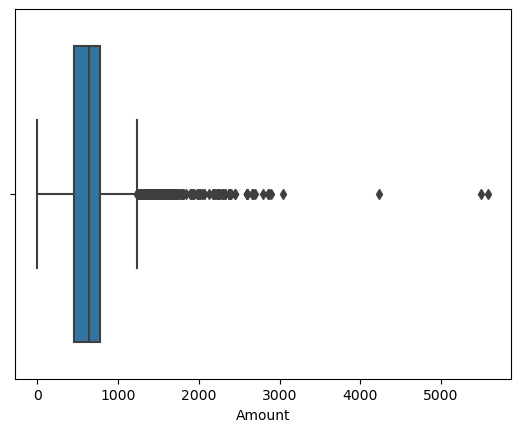

In [131]:
# plt.figure(figsize=[12,12])

sns.boxplot(x = "Amount", data = data)

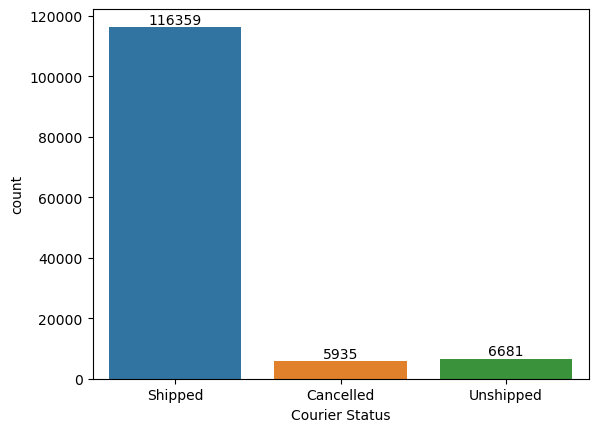

In [133]:
ax = sns.countplot(x = "Courier Status", data = data)
for bar in ax.containers:
    ax.bar_label(bar)

#### We can see that most of the order are shipped

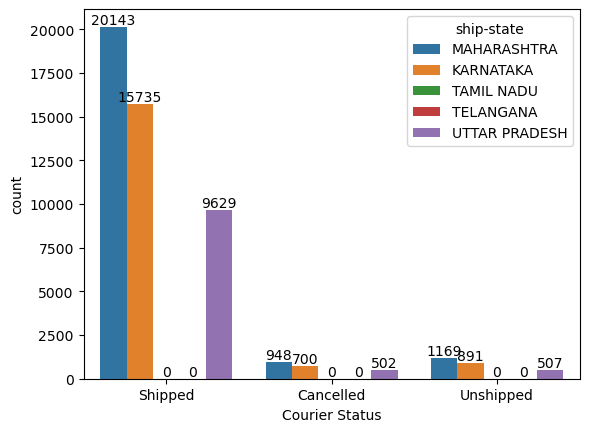

In [135]:
# plt.figure(figsize=[12,12])
ax = sns.countplot(x = "Courier Status" , data = data, hue= "ship-state", hue_order=["MAHARASHTRA","KARNATAKA","TAMIL NADU ","TELANGANA ","UTTAR PRADESH"])
for bar in ax.containers:
    ax.bar_label(bar)

#### we can see that most order shipped in maharashtra, karnataka and uttrapardesh

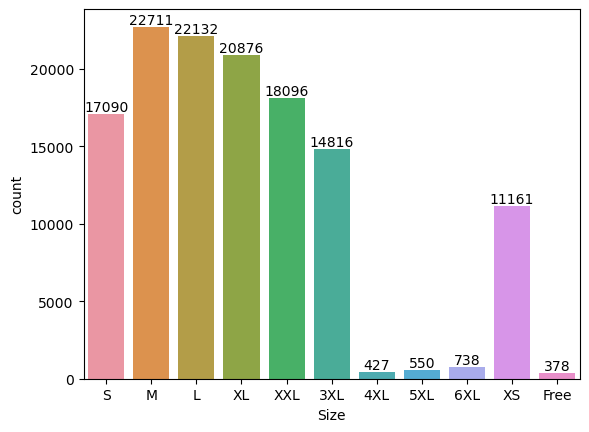

In [137]:
ax = sns.countplot(x= "Size", data = data, order=["S","M","L","XL","XXL","3XL","4XL","5XL","6XL","XS","Free"])
for bar in ax.containers:
    ax.bar_label(bar)

#### You can see that medium size sell most and then large is also competitor of medium

<Axes: xlabel='Qty', ylabel='Size'>

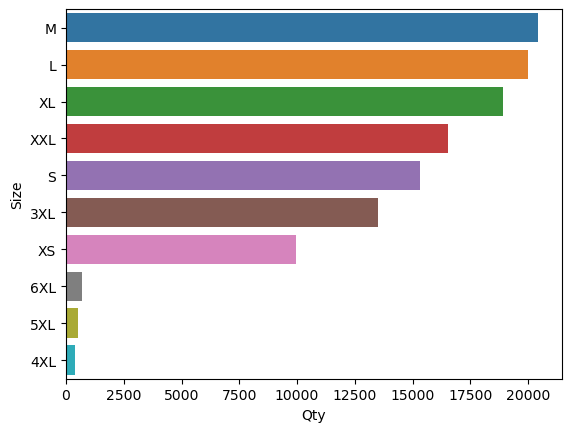

In [169]:
ax = data.groupby("Size")["Qty"].sum().sort_values(ascending=False).head(10).reset_index()
sns.barplot(y='Size', x='Qty', data=ax, orient="h")

#### we can see that M size clothes quantity buy most

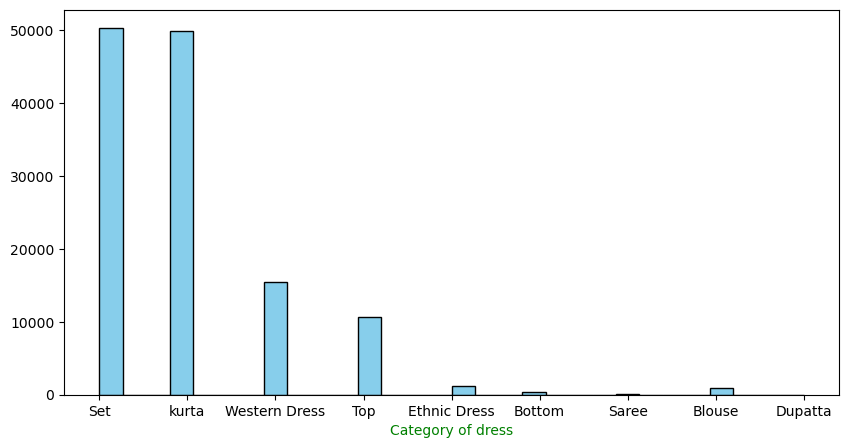

In [141]:
ax = data["Category"]
plt.figure(figsize=(10,5))
a = plt.hist(ax, bins=30, color='skyblue', edgecolor='black')
plt.xlabel("Category of dress", color = "green")
plt.show()



#### you can see that set and kurta is selling most

In [185]:
# n = data.groupby("ship-city")["Qty"].sum().sort_values(ascending=False).reset_index()

# # Select the top 10 cities by quantity
# top_10_cities = n.head(10)

# plt.figure(figsize=(12, 8))
# sns.barplot(y="ship-city", x="Qty", data=top_10_cities, orient='h')

# plt.xlabel("Total Quantity")
# plt.ylabel("Ship City")
# plt.title("Top 10 Cities by Total Quantity Shipped")

# plt.show()


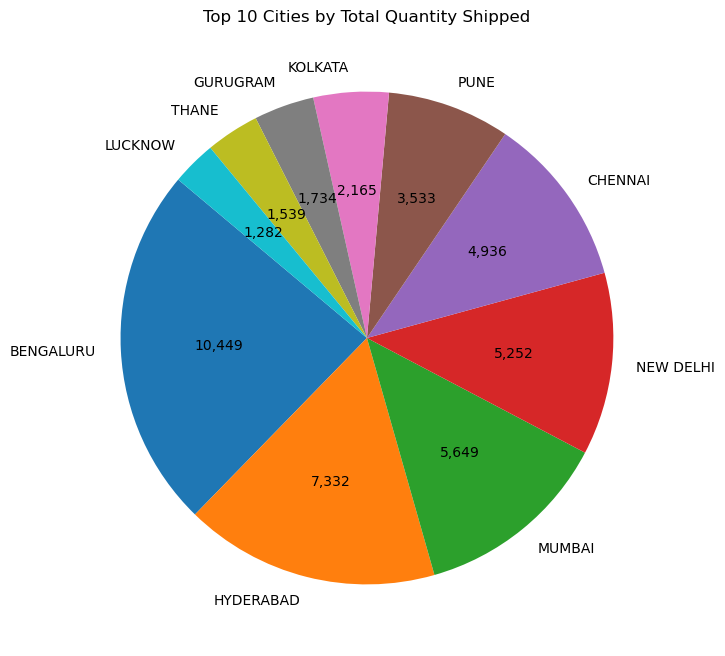

In [181]:
# Aggregate and prepare data
n = data.groupby("ship-city")["Qty"].sum().sort_values(ascending=False).reset_index()

# Select the top 10 cities by quantity
top_10_cities = n.head(10)

# Create a pie chart with total values displayed
plt.figure(figsize=(8, 8))

# Define a function to format the labels with the quantity values
def label_function(pct, all_values):
    total = sum(all_values)
    value = int(pct / 100. * total)
    return f'{value:,}'

# Create the pie chart
plt.pie(
    top_10_cities["Qty"],
    labels=top_10_cities["ship-city"],
    autopct=lambda pct: label_function(pct, top_10_cities["Qty"]),
    startangle=140
)
plt.title("Top 10 Cities by Total Quantity Shipped")

# Show plot
plt.show()


#### as you can see that most quantity shipped in bengaluru 

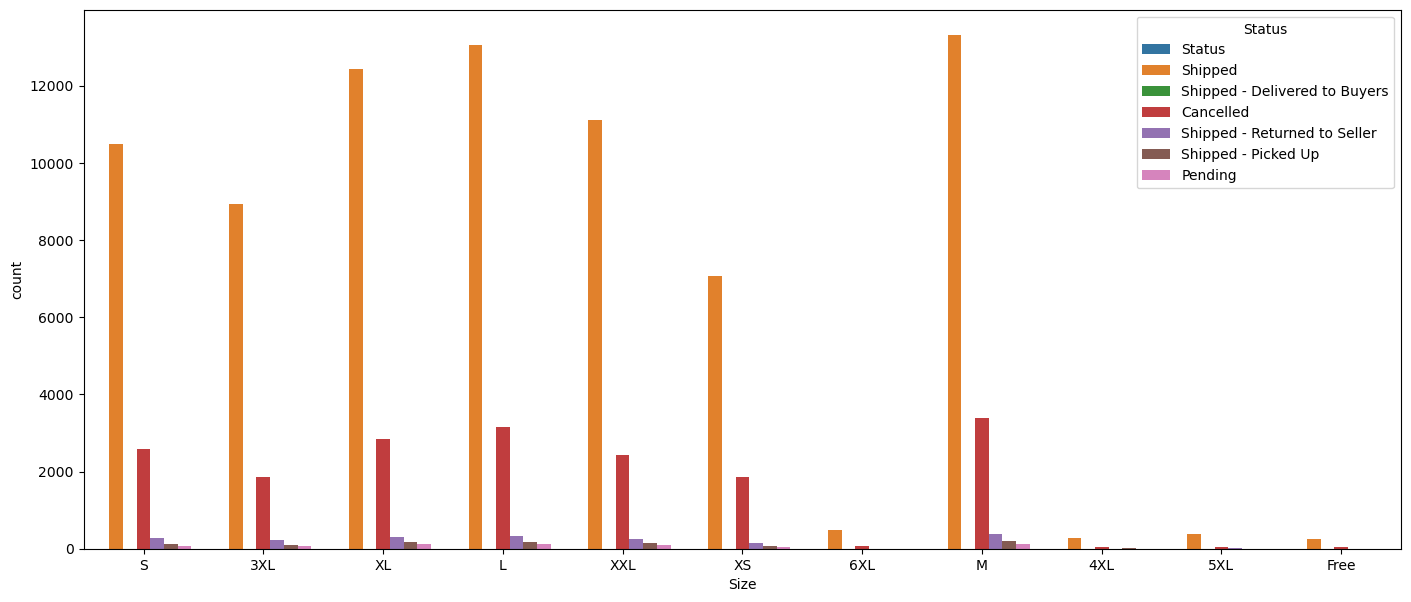

In [203]:
plt.figure(figsize=(17,7))
ax = sns.countplot(x="Size",data=data,hue="Status",hue_order=["Status","Shipped","Shipped - Delivered to Buyers","Cancelled","Shipped - Returned to Seller","Shipped - Picked Up","Pending"])

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


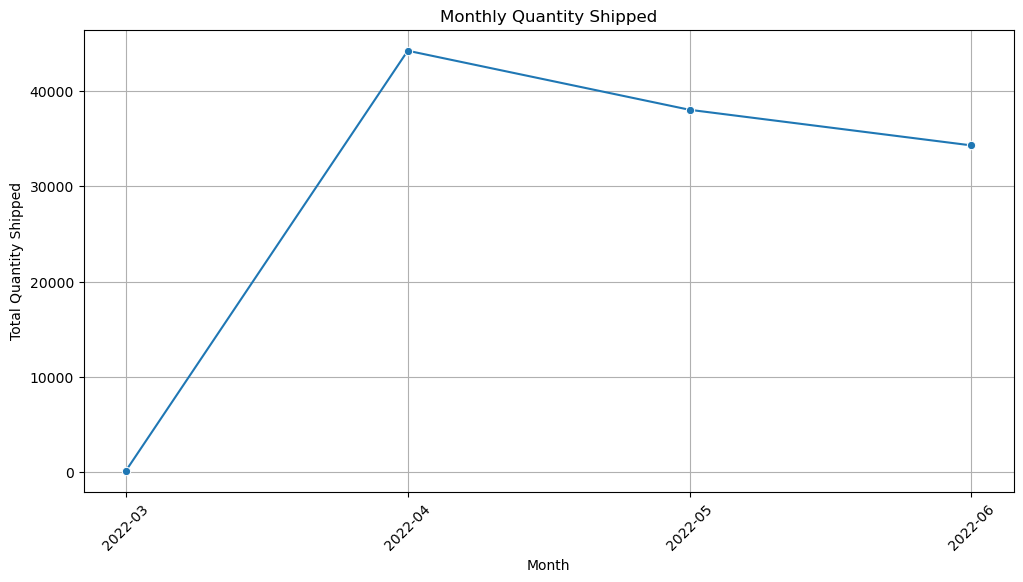

In [207]:
data['YearMonth'] = data['Date'].dt.to_period('M')

# Group by 'YearMonth' and sum 'Qty'
monthly_data = data.groupby('YearMonth')['Qty'].sum().reset_index()

# Convert 'YearMonth' to string for plotting
monthly_data['YearMonth'] = monthly_data['YearMonth'].astype(str)

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(x='YearMonth', y='Qty', data=monthly_data, marker='o')

# Customize plot
plt.xlabel("Month")
plt.ylabel("Total Quantity Shipped")
plt.title("Monthly Quantity Shipped")
plt.xticks(rotation=45)
plt.grid(True)